# Dirichlet boundary conditions

In [420]:
# This line imports [pv][dnm][cf] variables denoting the corresponding data
# p = pressure
# v = velocity
# d = Dirichlet boundary conditions
# n = Neumann boundary conditions
# m = mixed boundary conditions
# c = circle
# f = 7 arm flower
include("data.jl");

In [421]:
using LaTeXStrings
import PyPlot
plt = PyPlot
plt.svg(true);

function plot_results(x,y1,y2)
    fontd = Dict("family"=>"cmu serif");
    logx = log2(x);
    x_ticks = [LaTeXString("$(Int32(i))\$\\mathregular{^2}\$") for i in x];
    points = ["x","s","^"];
    lines = ["-","--","-."];
    colours = ["r","g","b"];
    norms = ["\\infty","2", "1"];
    norm_labels = [LaTeXString("\$\\|\\cdot\\|_$(norm_type)}\$") for norm_type in norms];
    ylabels = [];
    ax1 = plt.subplot(211);
    for i in 1:size(y1)[2]
        logy = log2(y1[:,i]);
        plt.scatter(logx,logy,marker=points[i],color=colours[i]);
    end
    
    for i in 1:size(y1)[2]
        logy = log2(y1[:,i]);
        a,b = linreg(logx, logy);
        plt.plot(logx,b*logx + a, "$(colours[i])$(lines[i])");
        plt.xlabel("");
        order = @sprintf("%4.2f",-b);
        push!(ylabels, LaTeXString(string("order = $order")));
        #plt.figtext(0.145, 0.2822*(3-i) + 0.12, "slope = $(round(b,2))");
        #plt.figtext(0.145, 0.2822*(3-i) + 0.16, "R = $(round(cor(logx,logy),2))");
    end
    plt.legend(vcat(ylabels,norm_labels), loc="upper left",frameon=false,bbox_to_anchor=(1, 1),prop=fontd);
    plt.setp(ax1[:get_xticklabels](), visible=false);
    
    ylabels = [];
    plt.ylabel("\$\\|\\mathbf{p} - \\mathbf{p}_h\\|\$");
    ax2 = plt.subplot(212, sharex=ax1);
    for i in 1:size(y2)[2]
        logy = log2(y2[:,i]);
        plt.scatter(logx,logy,marker=points[i],color=colours[i]);
    end
    for i in 1:size(y2)[2]
        logy = log2(y2[:,i]);
        a,b = linreg(logx, logy);
        plt.plot(logx,b*logx + a, "$(colours[i])$(lines[i])");
        plt.xlabel("");
        order = @sprintf("%4.2f",-b);
        push!(ylabels, LaTeXString(string("order = $order")));
        #plt.figtext(0.645, 0.2822*(3-i) + 0.12, "slope = $(round(b,2))");
        #plt.figtext(0.645, 0.2822*(3-i) + 0.16, "R = $(round(cor(logx,logy),2))");
    end
    plt.legend(vcat(ylabels,norm_labels), loc="upper left",frameon=false,bbox_to_anchor=(1, 1),prop=fontd);
    plt.ylabel("\$\\|\\mathbf{v} - \\mathbf{v}_h\\|\$");
    plt.xticks(logx, x_ticks);
    plt.xlabel(L"$\Delta x$");
end;

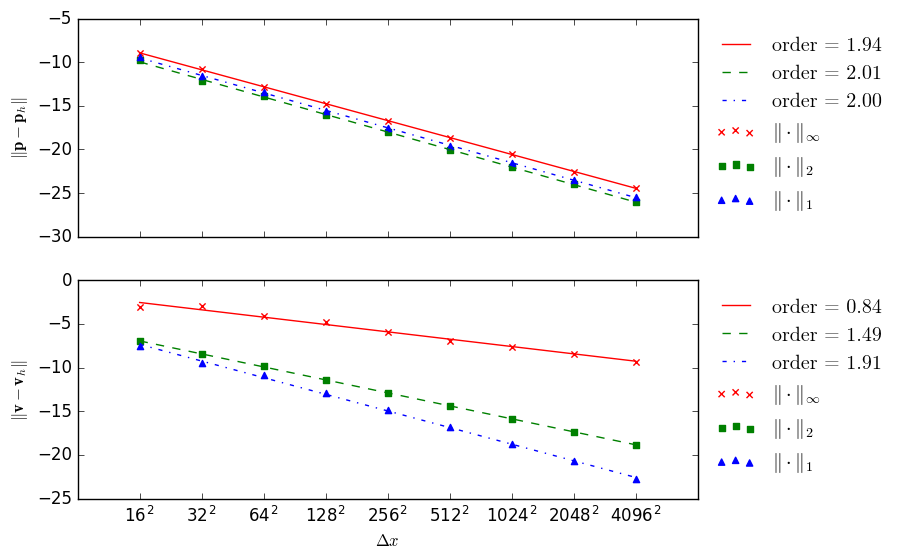

In [422]:
plot_results(h,pdc,vdc);

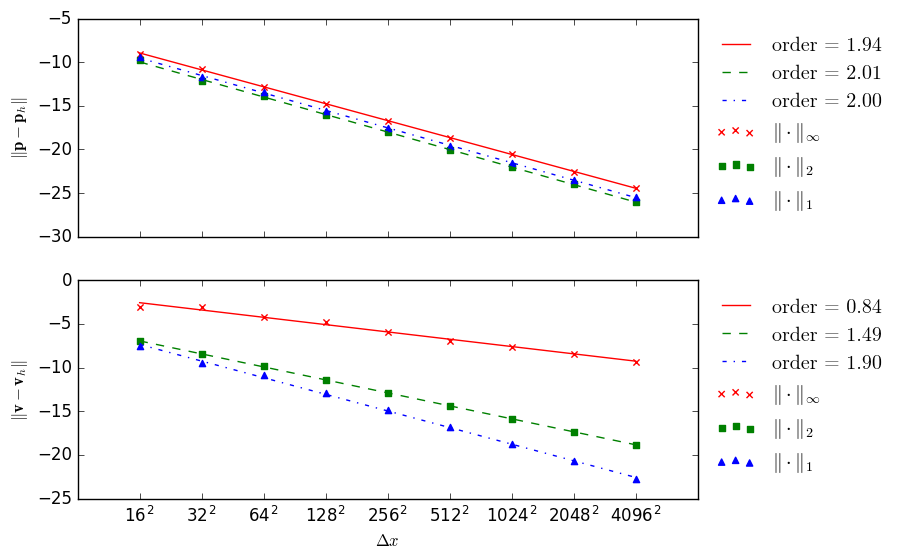

In [423]:
plot_results(h,pdf,vdf);

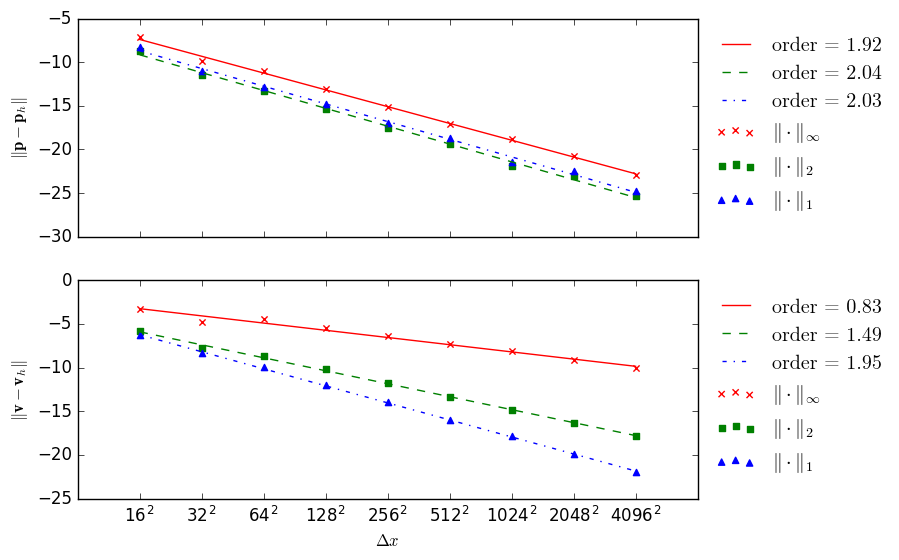

In [424]:
plot_results(h,pnc,vnc);

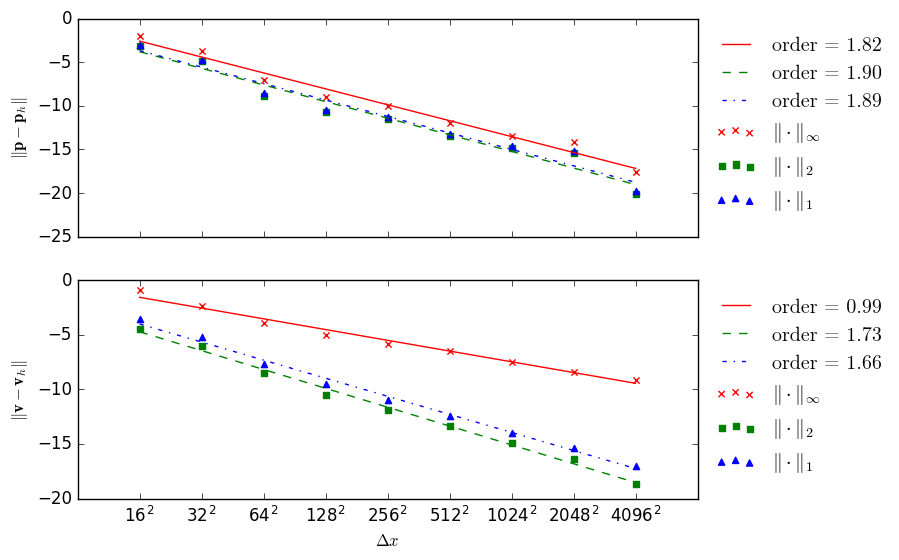

In [426]:
plot_results(h,pnf,vnf);